In [19]:
import numpy as np
from scipy.stats import norm

alpha = .05
n = 100
mu = 5
sigma = 1
z = norm.ppf(1-alpha/2)
B = 1_000_000

In [20]:
def e_mean(A: np.ndarray) -> np.ndarray:
    return np.einsum('ij->i', A) / A.shape[1]

X: np.ndarray = norm.rvs(loc=mu, scale=sigma, size=n)

mu_hat = X.mean()
theta_hat = np.exp(mu_hat)
print(theta_hat)

# Delta method
se_mu = 1/np.sqrt(n)
g_d = np.exp(mu_hat)
se_theta = g_d*se_mu

# Parametric bootstrap
xx_para: np.ndarray = norm.rvs(loc=mu_hat, scale=sigma, size=(B,n))
mu_para = xx_para.mean(axis=1)
# mu_para = e_mean(xx_para)
theta_para: np.ndarray = np.exp(mu_para)

# Non-parametric Bootstrap
xx_non = np.random.choice(X, size=(B,n), replace=True)
theta_non: np.ndarray = np.exp( xx_non.mean(axis=1) )
# theta_non: np.ndarray = np.exp( e_mean(xx_non) )

143.01530408028918


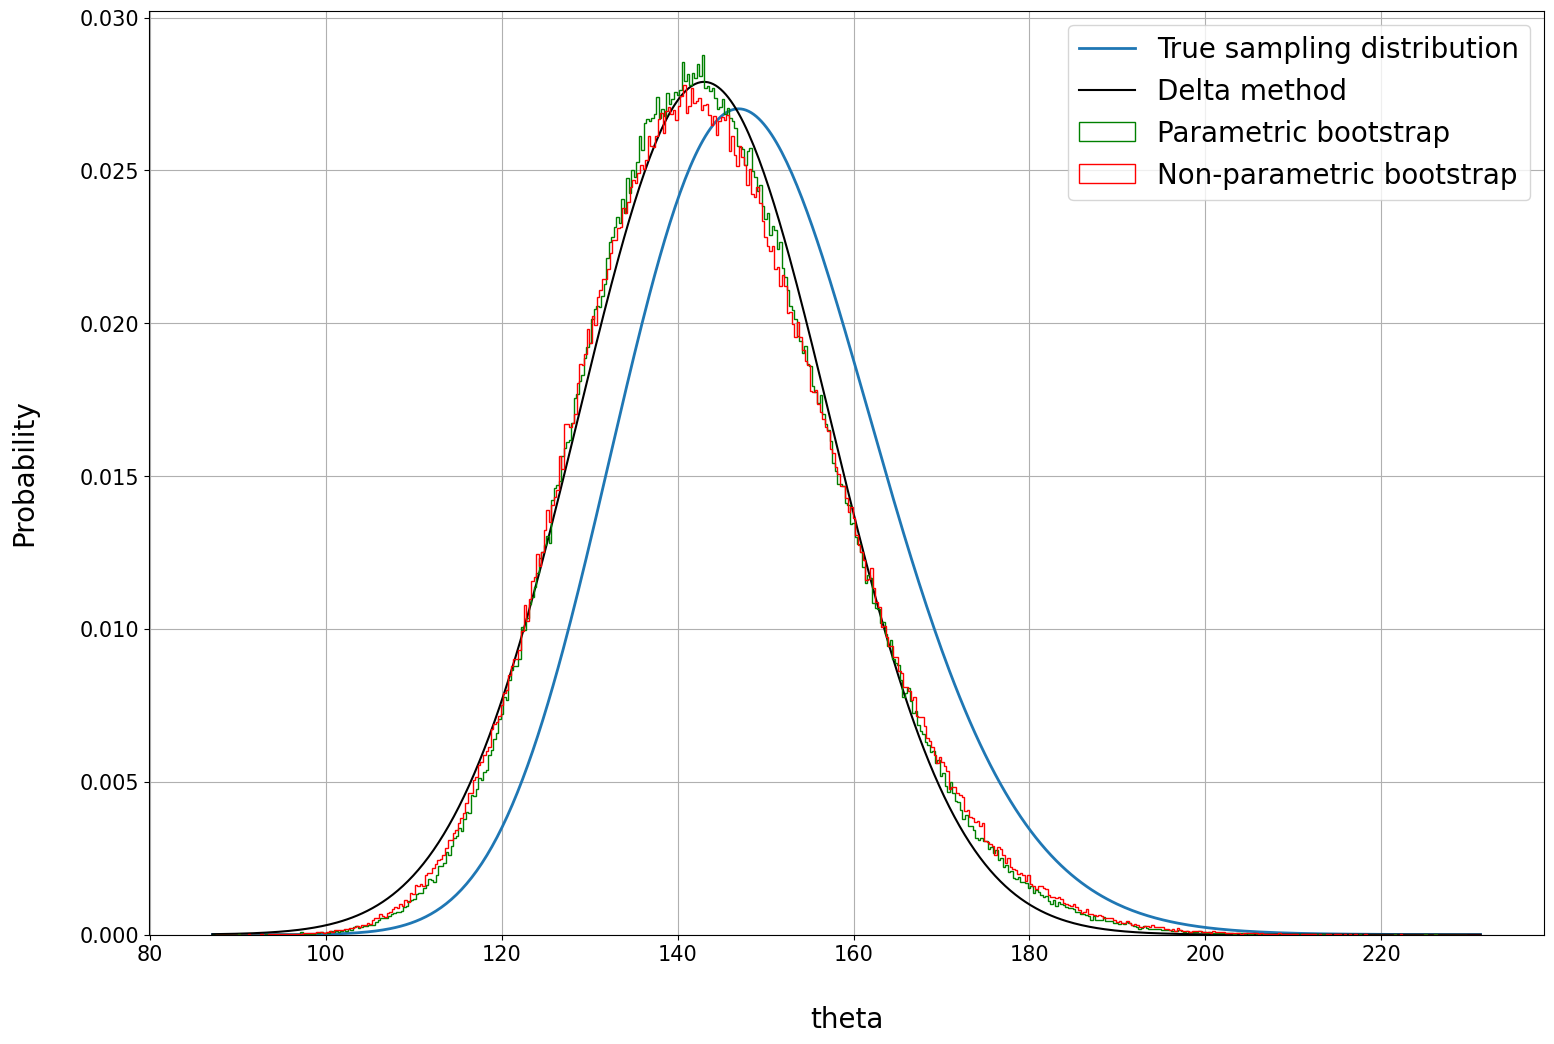

In [21]:
import matplotlib.pyplot as plt

bins = 500
tt = np.linspace(
    min(theta_para.min(), theta_non.min()), 
    max(theta_para.max(), theta_non.max()), 
    bins
)

# Generate the CDF for theta, calculate it for each bin, and include the differences between bins
sigma_theta = 1 / np.sqrt(n)

theta_cdf: np.ndarray = norm.cdf(np.log(tt), loc=mu, scale=sigma_theta)
theta_pdf: np.ndarray = np.gradient(theta_cdf, tt)

font_size = 20
label_pad = 30

plt.figure(figsize=(18, 12))
plt.plot(tt, theta_pdf, linewidth=2)
plt.plot(tt, norm.pdf(tt, loc=theta_hat, scale=se_theta), color='k')
plt.hist(theta_para, bins=bins, density=True, histtype='step', color='g')
plt.hist(theta_non, bins=bins, density=True, histtype='step', color='r')

plt.legend(
    [
        'True sampling distribution', 
        'Delta method',
        'Parametric bootstrap',
        'Non-parametric bootstrap'
    ], 
    fontsize=font_size
)

plt.xticks(fontsize=0.75*font_size)
plt.yticks(fontsize=0.75*font_size)

plt.xlabel('theta', fontsize=font_size, labelpad=label_pad)
plt.ylabel('Probability', fontsize=font_size, labelpad=label_pad)

plt.grid()
plt.show()

In [22]:
%reset -f